In [1]:
import jax
jax.config.update("jax_enable_x64", True)
#from bulirsch_fast import *
from bulirsch import *
from scipy.special import ellipe, ellipk
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

In [ ]:
x = np.linspace(-5, 5, 1000)
kc = 0.2
a = 1.2
b = 3.0
p = 2.0

#%timeit el1(x, kc)
#%timeit el1_fast(x, kc)

In [ ]:
%timeit jax.vmap(jax.grad(el1), in_axes=(0, None))(x, kc)
%timeit jax.vmap(jax.grad(el1_fast), in_axes=(0, None))(x, kc)

In [ ]:
kc = jnp.linspace(0.0, 10, 2)
kc
el1(0.0, jnp.array([0.0, 0.1]))

In [ ]:
x = np.linspace(-10, 10, 10)
kc = np.linspace(0.0, 10, 10)
el1(0.0, kc)

In [ ]:
x = np.linspace(-10, 10, 500)
kc = np.linspace(0.0, 1, 500)
coords = np.meshgrid(x, kc)
#plt.imshow(el1_fast(x, kc))
el1_vals = el1(coords[0].flatten(), coords[1].flatten()).reshape(500, 500)
plt.imshow(el1_vals, cmap=plt.cm.magma)
plt.colorbar()

In [ ]:
#n = 1 - p
#k2 = 0.9**2
#kc = np.sqrt(1 - k2)
kc = 2.9
#n = k2
n = 1.4

p = 1 - n
x = jnp.tan(jnp.pi / 3)

In [ ]:
jax.jacfwd(el3, (0, 1, 2))(x, kc, p)

In [ ]:
(el3(x + 1e-8, kc, p) - el3(x, kc, p)) / 1e-8

In [132]:
from scipy.integrate import romberg

@np.vectorize
def el3_numerical(x, kc, p):

    func = lambda y: (
        1 / (np.cos(y)**2 + p * np.sin(y)**2) 
        / np.sqrt(np.cos(y)**2 + kc * kc * np.sin(y)**2)
    )

    return romberg(func, 0, np.arctan(x), tol=1e-12)
        

In [133]:
help(romberg)

Help on function romberg in module scipy.integrate._quadrature:

romberg(function, a, b, args=(), tol=1.48e-08, rtol=1.48e-08, show=False, divmax=10, vec_func=False)
    Romberg integration of a callable function or method.
    
    .. deprecated:: 1.12.0
    
          This function is deprecated as of SciPy 1.12.0 and will be removed
          in SciPy 1.15.0. Please use `scipy.integrate.quad` instead.
    
    Returns the integral of `function` (a function of one variable)
    over the interval (`a`, `b`).
    
    If `show` is 1, the triangular array of the intermediate results
    will be printed. If `vec_func` is True (default is False), then
    `function` is assumed to support vector arguments.
    
    Parameters
    ----------
    function : callable
        Function to be integrated.
    a : float
        Lower limit of integration.
    b : float
        Upper limit of integration.
    
    Returns
    -------
    results : float
        Result of the integration.
    
    O

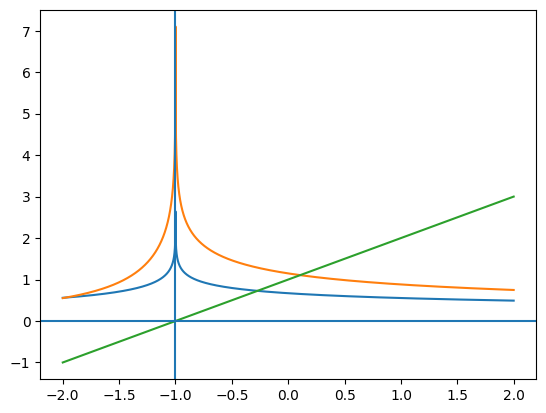

In [138]:
p = np.linspace(-100, 10, 10000)
kc = 3.0
x = jnp.tan(jnp.pi / 4)
plt.plot(p, el3(x, kc, p))
#plt.ylim(0, 2)

kc = 0.0
x = jnp.tan(jnp.pi / 4)
plt.plot(p, el3(x, kc, p))
#plt.ylim(0, 10)
plt.axvline(-1/jnp.tan(jnp.pi / 4)**2)
plt.plot(p, 1 + p * x**2)
plt.axhline(0)

In [ ]:
%timeit jax.vmap(jax.grad(el1), in_axes=(0, None))(x, kc)
%timeit jax.vmap(jax.grad(el1_fast), in_axes=(0, None))(x, kc)

In [ ]:
def el1_numerical(x, kc):

    func = lambda y: np.sqrt(1 / (np.cos(y)**2 + kc**2 * np.sin(y)**2))
    return quad(func, 0, np.arctan(x))[0]

x = np.linspace(-5, 5, 100)
plt.plot(x, np.vectorize(el1_numerical)(x, 0.2), '-', alpha=0.5, linewidth=5)
plt.plot(x, el1(x, 0.2), 'k--')

plt.figure()
kc = np.linspace(0.01, 2, 100)
plt.plot(x, np.vectorize(el1_numerical)(0.1, kc), '-', alpha=0.5, linewidth=5)
plt.plot(x, el1(0.1, kc), 'k--')

In [ ]:
def el2_numerical(x, kc, a, b):

    func = lambda y: ((a + b * np.tan(y)**2) 
                      / jnp.sqrt(
                          (1 + np.tan(y)**2) 
                          * (1 + kc**2 * np.tan(y)**2)
                      )
                     )
    
    return quad(func, 0, np.arctan(x))[0]

x = np.linspace(-5, 5, 100)
plt.plot(x, np.vectorize(el2_numerical)(x, 0.2, 0.1, 0.5), '-', alpha=0.5, linewidth=5)
plt.plot(x, el2(x, 0.2, 0.1, 0.5), 'k--')

plt.figure()
kc = np.linspace(0.01, 2, 100)
plt.plot(x, np.vectorize(el2_numerical)(0.1, kc, 0.1, 0.5), '-', alpha=0.5, linewidth=5)
plt.plot(x, el2(0.1, kc, 0.1, 0.5), 'k--')

In [ ]:
def el3_numerical(x, kc, p):

    func = lambda y: (
        1 / (np.cos(y)**2 + p * np.sin(y)**2) 
        / np.sqrt(np.cos(y)**2 + kc * kc * np.sin(y)**2)
    )
    
    return quad(func, 0, np.arctan(x))[0]

x = np.linspace(-5, 5, 100)
plt.plot(x, np.vectorize(el3_numerical)(x, 0.2, 0.1), '-', alpha=0.5, linewidth=5)
plt.plot(x, el3(x, 0.2, 0.1), 'k--')

plt.figure()
kc = np.linspace(0.01, 2, 100)
plt.plot(x, np.vectorize(el3_numerical)(0.1, kc, 0.1), '-', alpha=0.5, linewidth=5)
plt.plot(x, el3(0.1, kc, 0.1), 'k--')

In [ ]:
def cel_numerical(kc, p, a, b):

    func = lambda y: (
        (a * np.cos(y)**2 + b * np.sin(y)**2) / (np.cos(y)**2 + p * np.sin(y)**2)
        / np.sqrt(np.cos(y)**2 + kc**2 * np.sin(y)**2)
    )

    return quad(func, 0, np.pi / 2)[0]

x = np.linspace(-5, 5, 100)
plt.plot(x, np.vectorize(cel_numerical)(x, 0.2, 0.1, 0.5), '-', alpha=0.5, linewidth=5)
plt.plot(x, cel(x, 0.2, 0.1, 0.5), 'k--')

plt.figure()
kc = np.linspace(0, 2, 100)
plt.plot(kc, np.vectorize(cel_numerical)(0.1, kc, 0.1, 0.5), '-', alpha=0.5, linewidth=5)
plt.plot(kc, cel(0.1, kc, 0.1, 0.5), 'k--')

In [ ]:
x = np.linspace(-5, 5, 5000)
%timeit elliprc(x, 0.2)
rc(x, 0.2)
%timeit rc(x, 0.2)
plt.plot(x, elliprc(x, 0.2), '-', alpha=0.5, linewidth=5)
plt.plot(x, rc(x, 0.2), 'k--')

plt.figure()
x = np.linspace(0, 2, 100)
plt.plot(kc, elliprc(0.1, x), '-', alpha=0.5, linewidth=5)
plt.plot(kc, rc(0.1, x), 'k--')

In [ ]:
x = np.linspace(-5, 5, 100)
plt.plot(x, elliprd(x, 0.2, 0.1), '-', alpha=0.5, linewidth=5)
plt.plot(x, rd(x, 0.2, 0.1), 'k--')

plt.figure()
x = np.linspace(0, 2, 100)
plt.plot(kc, elliprd(0.1, x, 0.1), '-', alpha=0.5, linewidth=5)
plt.plot(kc, rd(0.1, x, 0.1), 'k--')

In [ ]:
x = np.linspace(-5, 5, 100)
plt.plot(x, elliprf(x, 0.2, 0.1), '-', alpha=0.5, linewidth=5)
plt.plot(x, rf(x, 0.2, 0.1), 'k--')

plt.figure()
x = np.linspace(0, 2, 100)
plt.plot(kc, elliprf(0.1, x, 0.1), '-', alpha=0.5, linewidth=5)
plt.plot(kc, rf(0.1, x, 0.1), 'k--')

In [ ]:
x = np.linspace(-5, 5, 100)
plt.plot(x, elliprj(x, 0.2, 0.1, 0.5), '-', alpha=0.5, linewidth=5)
plt.plot(x, rj(x, 0.2, 0.1, 0.5), 'k--')

plt.figure()
x = np.linspace(0, 2, 100)
plt.plot(kc, elliprj(0.1, x, 0.1, 0.5), '-', alpha=0.5, linewidth=5)
plt.plot(kc, rj(0.1, x, 0.1, 0.5), 'k--')

In [ ]:
x = 1.0
kc = 0.2
p = 0.1

print((el3(x + 1e-6, kc, p) - el3(x, kc, p)) / 1e-6)
print((el3(x, kc + 1e-6, p) - el3(x, kc, p)) / 1e-6)
print((el3(x, kc, p + 1e-6) - el3(x, kc, p)) / 1e-6)

jax.jacfwd(el3, (0, 1, 2))(x, kc, p)

In [ ]:
kc = 1.0
p = 1.0
a = 1.3
b = 2.0
x = 2.3

d = 1e-12

print((cel(kc + d, p, a, b) - cel(kc, p, a, b)) / d)
print((cel(kc, p + d, a, b) - cel(kc, p, a, b)) / d)
print((cel(kc, p, a + d, b) - cel(kc, p, a, b)) / d)
print((cel(kc, p, a, b + d) - cel(kc, p, a, b)) / d)

fwd_cel = jax.jacfwd(cel, (0, 1, 2, 3))
fwd_el3 = jax.jacfwd(el3, (0, 1, 2))
#%timeit fwd_cel(kc, p, a, b)
%timeit el3(x, kc, p)

In [ ]:
ap = (a - b) * (kc**2 - 1)
bp = - ((kc**2 - 1) * (-3 * b + (a + 2 * b) * kc**2))
cel(kc, 1.0, ap, bp) / (3 * (kc**2 - 1)**2)

In [ ]:
ap = 4 * (kc**2 - 1) * (2 * b + (a - 3 * b) * kc**2)
bp = 4 * kc**2 * (kc**2 - 1) * (b - a * kc**2)
fac = 1 / (12 * kc**4 * (1 - kc ** 2)* (-1 + kc**2))
fac * cel(kc, 1.0, ap, bp)

In [ ]:
-kc / (1 - kc * kc) * (cel(kc, kc**2, b / kc**2, a) - cel(kc, 1.0, b / kc**2, a))

In [ ]:
Eterm = ellipe(jnp.sqrt(1 - kc**2)) * (-b + a * kc * kc) / (kc * kc * (kc * kc - 1))
Fterm = (b - a) * ellipk(1 - kc**2) / (kc**2 - 1)
print(Eterm)

In [ ]:
ellipe(jnp.sqrt(1 - kc**2))

In [ ]:
from scipy.special import ellipe as ellipe_np
ellipe_np(1 - kc**2)

In [ ]:
from legendre import ellippi, ellipk
kc, p, a, b = 1.0, 1.0, 1.0, 1.0

print((cel(kc, p, a, b + 1e-6) - cel(kc, p, a, b)) / 1e-6)

n = p - 1.0
k = jnp.sqrt(1 - kc * kc)
ellipk(k) / n - cel(kc, p, 1.0, 1.0) / n

In [ ]:
from legendre import *
ellipe(1 - kc**2)

In [ ]:
kc, p, a, b = 0.5, 1.0, 1.0, 1.0
n = p - 1.0
k = jnp.sqrt(1 - kc * kc)

print((cel(kc, p, a, b + 1e-6) - cel(kc, p, a, b)) / 1e-6)
cel(kc, p, 0.0, 1.0)

In [ ]:
kc, p, a, b = 0.5, 1.0, 1.0, 1.0
n = p - 1.0
k = jnp.sqrt(1 - kc * kc)

print((cel(kc, p, a + 1e-6, b) - cel(kc, p, a, b)) / 1e-6)
cel(kc, p, 1.0, 0.0)

In [ ]:
kc, p, a, b = 0.5, 1.01, 1.0, 1.0
n = p - 1.0
k = jnp.sqrt(1 - kc * kc)

print((cel(kc, p + 1e-6, a, b) - cel(kc, p, a, b)) / 1e-6)
lam = kc * kc * (b + a * p - 2 * b * p) + p * (3 * b * p - a * p**2 - 2*b)
dp = cel(kc, p, 0.0, lam) + (b - a * p) * cel(kc, 1.0, 1.0 - p, kc * kc - p)
dp /= 2 * p * (1 - p) * (p - kc * kc)
dp

In [ ]:
parr = np.linspace(0.1, 2, 1000)
plt.plot(parr, cel(kc, parr, 1.0, 1.0))

In [ ]:
cel(kc, p, 0.0, lam)

In [ ]:
cel(kc, p, 0.0, 1.0) * lam

In [ ]:
cel(kc, p, lam, 0.0)

In [ ]:
cel(kc, p, 1.0, 0.0) * lam

In [ ]:
cel(kc, p, 0.0, lam) + (b - a * p) * cel(kc, 1.0, 1.0 - p, kc * kc - p)

In [ ]:
lam * cel(kc, p, 0.0, 1.0) + (b - a * p) * cel(kc, 1.0, 1.0 - p, kc * kc - p)